<a href="https://colab.research.google.com/github/poddardelhi/crm_homeTask/blob/main/HomeTask_CRMAnalyst.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Jovian Commit Essentials
# Please retain and execute this cell without modifying the contents for `jovian.commit` to work
!pip install jovian --upgrade -q
import jovian
jovian.set_project('crm-analyst-home-task')
jovian.set_colab_id('19qlyMoLkYQQTuyeGOT8H77D-46PRtm_K')

     |████████████████████████████████| 71kB 3.6MB/s 


# Commit the work

In [45]:
#Save the work to JOVIAN.ML
project_name = "crm-analyst-home-task"
 # change this
jovian.commit(project=project_name)

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ai/poddardelhi/crm-analyst-home-task


'https://jovian.ai/poddardelhi/crm-analyst-home-task'

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Importing the necessary libraries
import numpy as np
import pandas as pd
import pandas_profiling
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# Task 1



1. Calculate the following rates, based on data from the page "1. Data" (in the data sheet there are columns currently empty - fill them):
  
  1.1. Funnel Start Rate (Rate at which Sessions become Started Applications).
  
  1.2. Approval Rate (Rate at which Finished Applications become Approved Applications)
  
  1.3. Write Rate (Rate at which Approved Applications become Paid Applications)






In [ ]:
df_application= pd.read_csv("/content/drive/MyDrive/Jovian/Ferratum_CRM/data_q1.csv")

In [ ]:
df_application.head()

,Country,Date,Date_HR,Sessions,StartedApplications,FinishedApps,Approved,PaidOut
0,Australia,43466,01/01/2019,91127.0,28144.0,10587,523.0,510.0
1,Australia,43497,01/02/2019,77586.0,24290.0,9054,546.0,537.0
2,Australia,43525,01/03/2019,65420.0,18904.0,7614,446.0,439.0
3,Brazil,43466,01/01/2019,232295.0,143099.0,14264,1229.0,678.0
4,Brazil,43497,01/02/2019,168190.0,99253.0,14090,755.0,321.0


In [ ]:
df_application.shape

(66, 8)

In [ ]:
#checking the Null or Nan values
df_application.isna().sum()

Country                0
Date                   0
Date_HR                0
Sessions               3
StartedApplications    3
FinishedApps           0
Approved               2
PaidOut                2
dtype: int64

In [ ]:
# Finding the individual rows that are Null/NaN type
none_values=df_application[df_application.isna().any(axis=1)][::]
none_values.head()


,Country,Date,Date_HR,Sessions,StartedApplications,FinishedApps,Approved,PaidOut
39,Nigeria,43466,01/01/2019,NaN,NaN,92940,6.0,4.0
40,Nigeria,43497,01/02/2019,NaN,NaN,70493,4.0,1.0
41,Nigeria,43525,01/03/2019,NaN,NaN,60915,5.0,2.0
52,Russia,43497,01/02/2019,38605.0,13951.0,6228,NaN,NaN
53,Russia,43525,01/03/2019,16772.0,389.0,0,NaN,NaN


## Empty columns?
We have many empty columns for countries Nigeria and Russia. I'm taking a assumption here that every time a user logs in, it is recorded as 1 session. Therefore, I'm disregarding Nigeria during analysis and value 0 is replaced for all empty cells.

In case of Russia, all NaN cells are replaced with value 0


In [ ]:
df_application.fillna(value=0, axis=1, inplace=True)
df_application.isna().sum()

Country                0
Date                   0
Date_HR                0
Sessions               0
StartedApplications    0
FinishedApps           0
Approved               0
PaidOut                0
dtype: int64

In [ ]:
# Dropping the excel serial date column 
df_application.drop(labels='Date', axis=1,inplace=True)
df_application.head()

,Country,Date_HR,Sessions,StartedApplications,FinishedApps,Approved,PaidOut
0,Australia,01/01/2019,91127.0,28144.0,10587,523.0,510.0
1,Australia,01/02/2019,77586.0,24290.0,9054,546.0,537.0
2,Australia,01/03/2019,65420.0,18904.0,7614,446.0,439.0
3,Brazil,01/01/2019,232295.0,143099.0,14264,1229.0,678.0
4,Brazil,01/02/2019,168190.0,99253.0,14090,755.0,321.0


In [ ]:
df_application.rename(columns={'Date_HR':'Date'},inplace=True)
df_application['Date'] = pd.to_datetime(df_application.Date, format='%d/%m/%Y')
df_application['Date']=df_application['Date'].dt.strftime('%d/%m/%Y')
df_application['Date'] = pd.to_datetime(df_application['Date'])
df_application['Month']= pd.DatetimeIndex(df_application['Date']).month

In [ ]:
# renaming the month integer values (1,2,3) to string values 
df_application['Month']= df_application['Month'].replace({1:"January", 2:"February",3:"March"})
df_application.head()

,Country,Date,Sessions,StartedApplications,FinishedApps,Approved,PaidOut,Month
0,Australia,2019-01-01,91127.0,28144.0,10587,523.0,510.0,January
1,Australia,2019-02-01,77586.0,24290.0,9054,546.0,537.0,February
2,Australia,2019-03-01,65420.0,18904.0,7614,446.0,439.0,March
3,Brazil,2019-01-01,232295.0,143099.0,14264,1229.0,678.0,January
4,Brazil,2019-02-01,168190.0,99253.0,14090,755.0,321.0,February


# Calculate the following rates, based on data from the page 

In [ ]:
#Funnel Start Rate
df_application['FunnelStartRate']= (df_application['StartedApplications']/ df_application['Sessions']) * 100
#Conversion rate
df_application['ConversionRate']= (df_application['FinishedApps']/ df_application['StartedApplications']) * 100
#Approval rate
df_application['ApprovalRate']= (df_application['Approved']/df_application['FinishedApps']) *100

# Write Rate
df_application['WriteRate']= (df_application['PaidOut']/ df_application['Approved']) *100
#Displaying the above calculated values
df_application.loc[:5,['Country','Date','FunnelStartRate','ConversionRate','ApprovalRate', 'WriteRate']]


,Country,Date,FunnelStartRate,ConversionRate,ApprovalRate,WriteRate
0,Australia,2019-01-01,30.884370,37.617254,4.940021,97.514340
1,Australia,2019-02-01,31.307195,37.274599,6.030484,98.351648
2,Australia,2019-03-01,28.896362,40.277190,5.857631,98.430493
3,Brazil,2019-01-01,61.602273,9.967924,8.616096,55.166802
4,Brazil,2019-02-01,59.012426,14.196044,5.358410,42.516556
5,Brazil,2019-03-01,47.402617,24.424740,4.333376,59.292035


#Creating the pivot visualization of all the rates in Q1 months

In [ ]:
pivot_df_month_SR= df_application.pivot_table(index='Country', columns='Month', values='FunnelStartRate',dropna=True)
pivot_df_month_CR=df_application.pivot_table(index='Country', columns='Month', values='ConversionRate',dropna=True)
pivot_df_month_AR= df_application.pivot_table(index='Country', columns='Month', values='ApprovalRate', dropna=True)
pivot_df_month_WR= df_application.pivot_table(index='Country', columns='Month', values='WriteRate', dropna=True)


In [ ]:
pivot_df_month_SR

Month,February,January,March
Country,,,
Australia,31.307195,30.884370,28.896362
Brazil,59.012426,61.602273,47.402617
Bulgaria,22.737165,22.973928,24.387118
Canada,26.395182,36.232423,36.622216
Croatia,18.990106,18.948019,21.451745
Czech Republic,8.205601,8.142557,7.512537
Denmark,8.815102,13.532161,25.210625
Estonia,10.324080,10.503194,9.842666
Finland,11.793417,11.304145,11.874489


/usr/local/lib/python3.7/dist-packages/matplotlib/transforms.py:416: RuntimeWarning: invalid value encountered in double_scalars
  return (x0, y0, x1 - x0, y1 - y0)


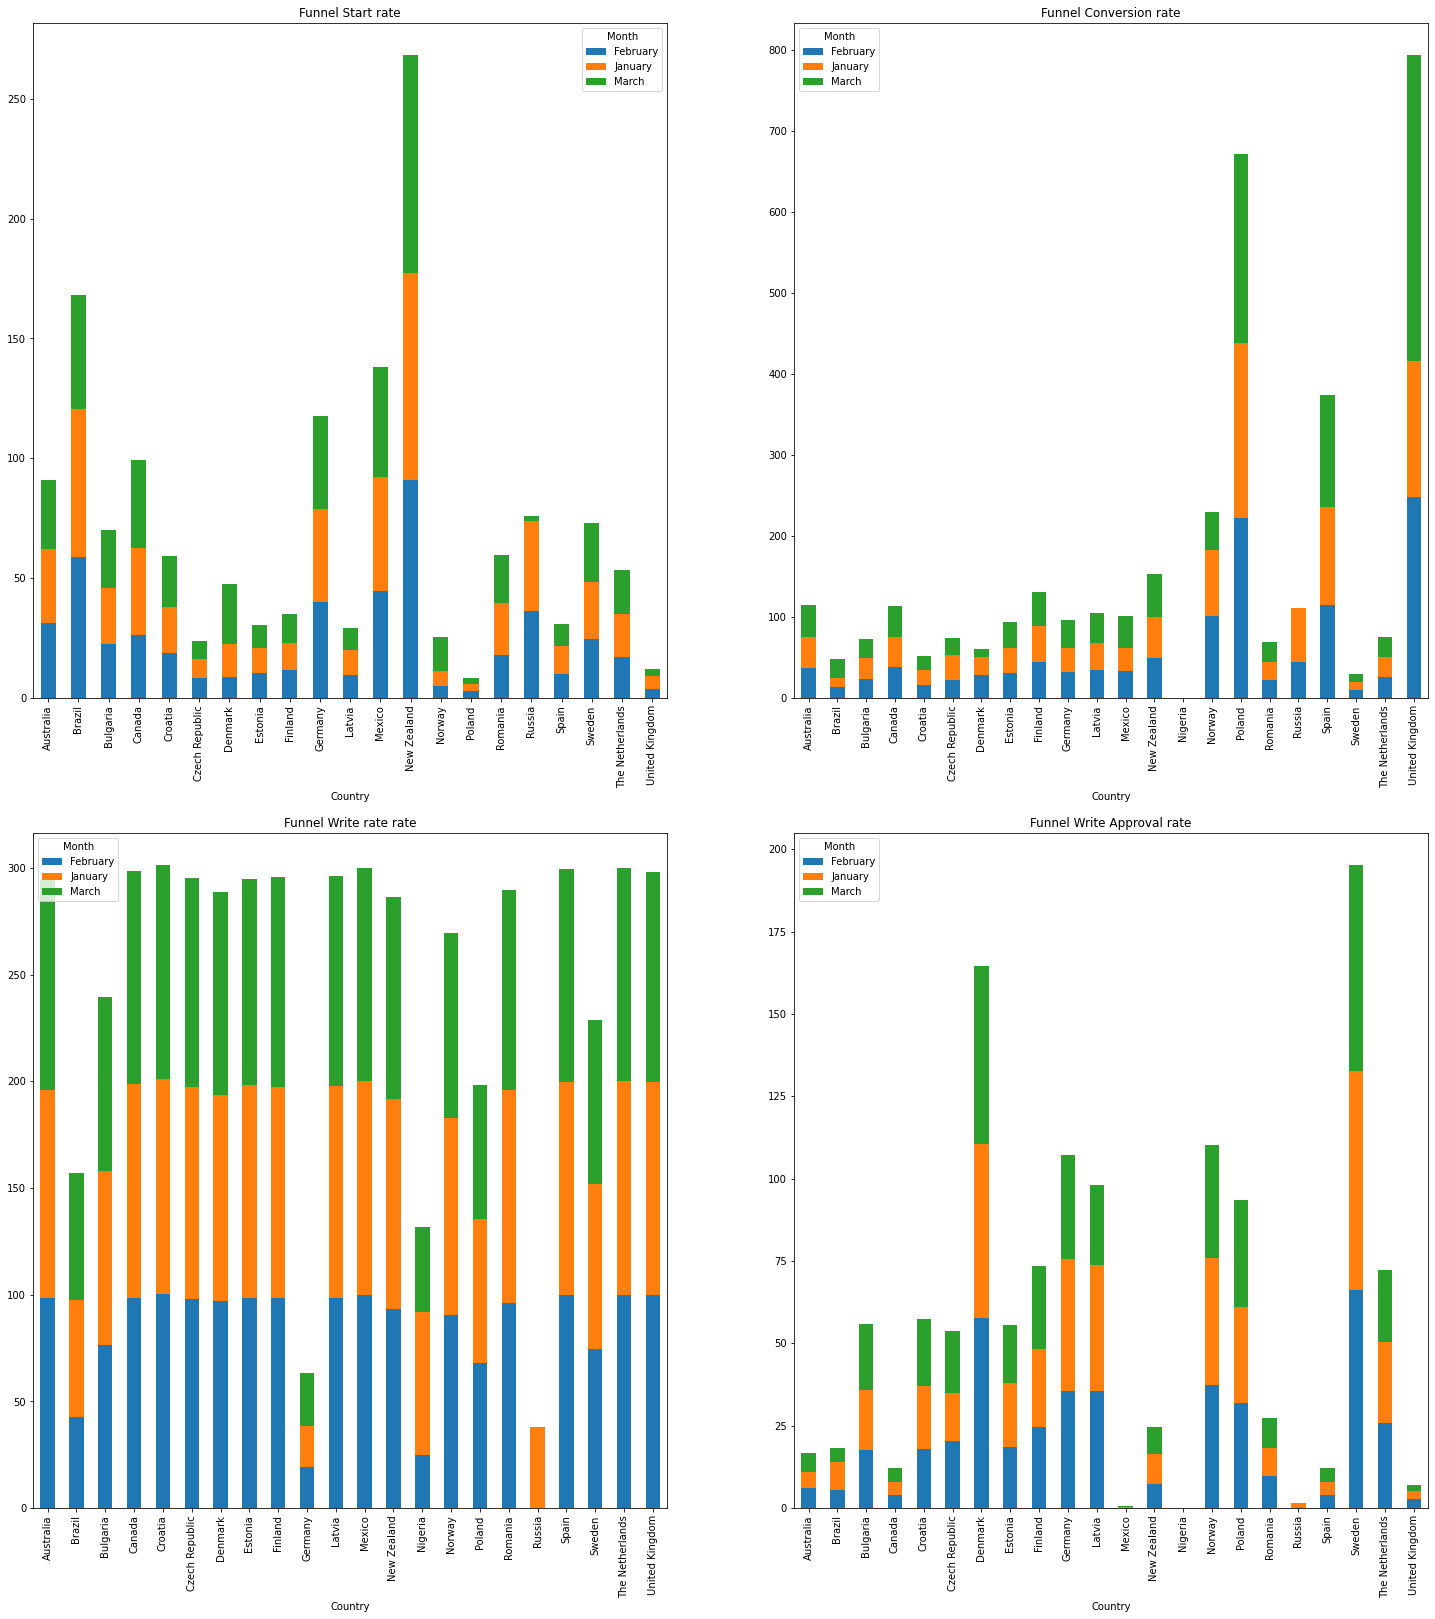

In [ ]:
#pivot_df_month_SR.loc[:,['February', 'January','March']].plot.bar( stacked= True, color=colors,figsize(10,7))

fig,([ax1,ax2],[ax3,ax4])= plt.subplots(2,2)
fig.set_figheight(15)
fig.set_figwidth(25)

ax1.set_title('Funnel Start rate')
pivot_df_month_SR.plot(kind='bar',stacked=True,ax=ax1);
ax2.set_title('Funnel Conversion rate')
pivot_df_month_CR.plot(kind='bar',stacked=True,ax=ax2);
ax3.set_title('Funnel Write rate rate')

pivot_df_month_WR.plot(kind='bar',stacked=True,ax=ax3);
ax4.set_title('Funnel Write Approval rate')

pivot_df_month_AR.plot(kind='bar',stacked=True,ax=ax4);

plt.subplots_adjust(top=1.5)
plt.show()


# Create a visualization to see Group (all countries aggregated) trend over Q1 for those rates, and \# of Paid Out Loans.

In [ ]:
df_application_agg=df_application.copy()
df_application_agg=df_application_agg.groupby(['Country']).sum().reset_index()

df_application_agg['FunnelStartRate']= (df_application_agg['StartedApplications']/ df_application_agg['Sessions']) * 100
#Conversion rate
df_application_agg['ConversionRate']= (df_application_agg['FinishedApps']/ df_application_agg['StartedApplications']) * 100
#Approval rate
df_application_agg['ApprovalRate']= (df_application_agg['Approved']/df_application_agg['FinishedApps']) *100

# Write Rate
df_application_agg['WriteRate']= (df_application_agg['PaidOut']/ df_application_agg['Approved']) *100
#Displaying the above calculated values
df_application_agg.head()

,Country,Sessions,StartedApplications,FinishedApps,Approved,PaidOut,FunnelStartRate,ConversionRate,ApprovalRate,WriteRate
0,Australia,234133.0,71338.0,27255,1515.0,1486.0,30.469007,38.205445,5.558613,98.085809
1,Brazil,468053.0,274381.0,36177,2323.0,1200.0,58.621780,13.184951,6.421207,51.657340
2,Bulgaria,238303.0,55402.0,13490,2500.0,1996.0,23.248553,24.349301,18.532246,79.840000
3,Canada,47676.0,15614.0,5932,240.0,239.0,32.750231,37.991546,4.045853,99.583333
4,Croatia,210653.0,41228.0,7068,1346.0,1352.0,19.571523,17.143689,19.043577,100.445765


# visualization 

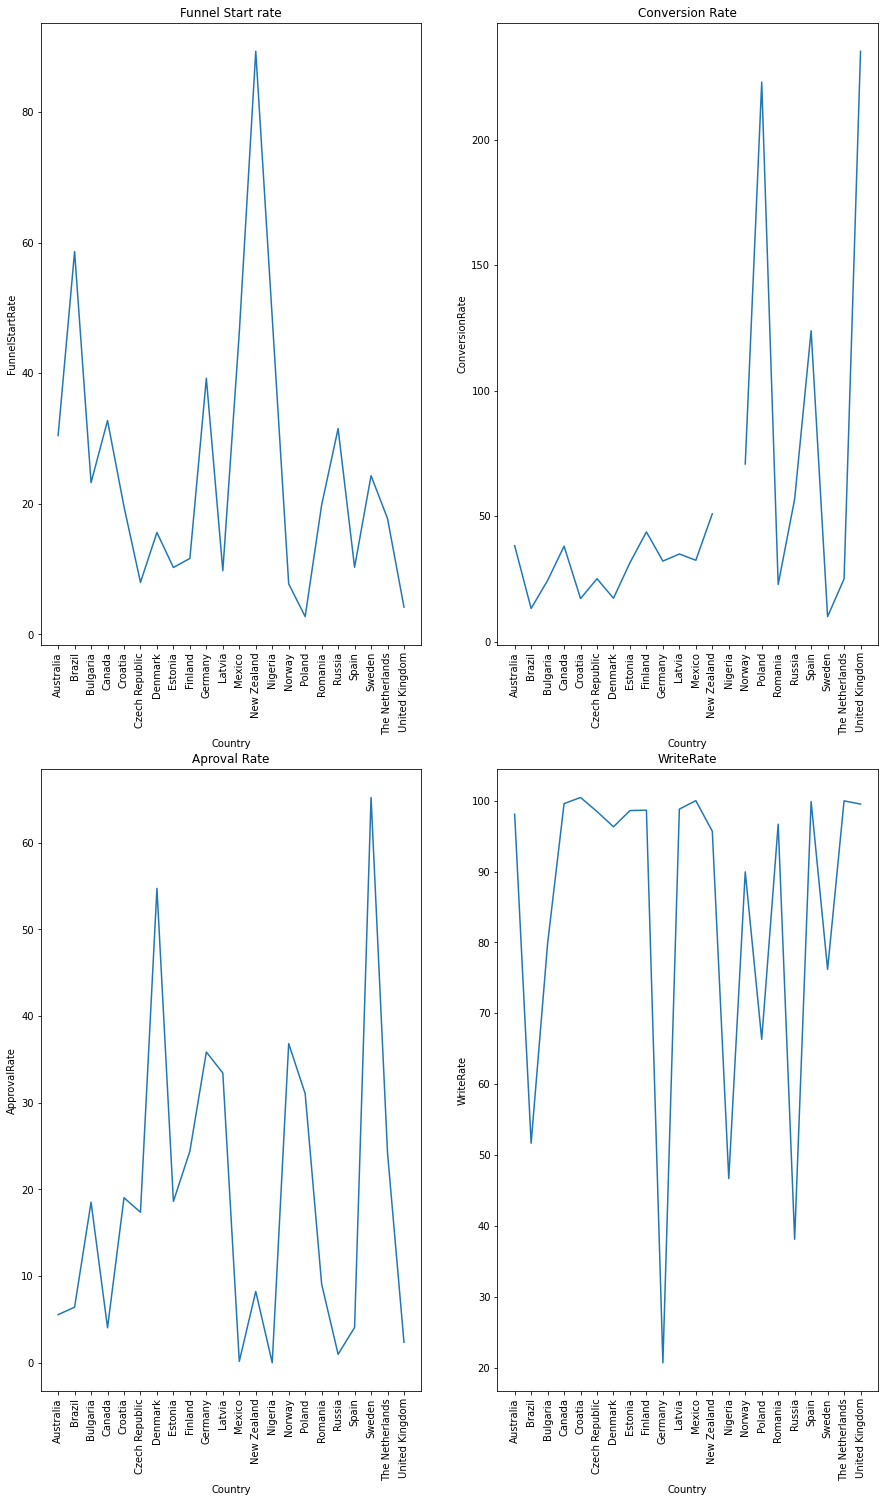

In [ ]:
fig,([ax1,ax2],[ax3,ax4])= plt.subplots(2,2)
fig.set_figheight(8)
fig.set_figwidth(15)

ax1.set_title('Funnel Start rate')
sns.lineplot(data= df_application_agg, x= 'Country', y='FunnelStartRate',ax=ax1 )
ax2.set_title('Conversion Rate')
sns.lineplot(data= df_application_agg, x= 'Country', y='ConversionRate',ax=ax2 )
ax3.set_title('Aproval Rate')
sns.lineplot(data= df_application_agg, x= 'Country', y='ApprovalRate',ax=ax3 )
ax4.set_title('WriteRate')
sns.lineplot(data= df_application_agg, x= 'Country', y='WriteRate',ax=ax4 )

plt.subplots_adjust(top=2.5)

for labels in ax1.get_xticklabels() + ax2.get_xticklabels() + ax3.get_xticklabels() + ax4.get_xticklabels():
  labels.set_rotation(90)


# Are there visible anomalies in the data? Where? What could be the cause?

Since these vairables represents levels of funnel, therefore, lower level value should not be greater than top funnel stage. We will check this case using the helper function.

In [ ]:
df= df_application.copy()
df=df.groupby(['Country']).sum().reset_index()
df.head()

,Country,Sessions,StartedApplications,FinishedApps,Approved,PaidOut,FunnelStartRate,ConversionRate,ApprovalRate,WriteRate
0,Australia,234133.0,71338.0,27255,1515.0,1486.0,91.087927,115.169043,16.828135,294.296482
1,Brazil,468053.0,274381.0,36177,2323.0,1200.0,168.017316,48.588709,18.307883,156.975394
2,Bulgaria,238303.0,55402.0,13490,2500.0,1996.0,70.098210,72.791430,56.010924,239.321554
3,Canada,47676.0,15614.0,5932,240.0,239.0,99.249821,114.167728,12.148329,298.591549
4,Croatia,210653.0,41228.0,7068,1346.0,1352.0,59.389870,51.414085,57.479713,301.290978


In [ ]:
df['FunnelValueChecks']= np.where(((df.Sessions>df.StartedApplications) & (df.StartedApplications> df.FinishedApps) & 
                                   (df.FinishedApps>df.Approved) &(df.Approved >df.PaidOut)
                                                ), 'True', 'False')


print(df[['Country','FunnelValueChecks']])

            Country FunnelValueChecks
0         Australia              True
1            Brazil              True
2          Bulgaria              True
3            Canada              True
4           Croatia             False
5    Czech Republic              True
6           Denmark              True
7           Estonia              True
8           Finland              True
9           Germany              True
10           Latvia              True
11           Mexico             False
12      New Zealand              True
13          Nigeria             False
14           Norway              True
15           Poland             False
16          Romania              True
17           Russia              True
18            Spain             False
19           Sweden              True
20  The Netherlands              True
21   United Kingdom             False


Let's print all the rows who have FunnelValueChecks= False. As per the assumption taken below countries i.e., Croatia, Mexico, Nigeria, Poland, Spain, and United Kingdom have anamoloies. 

In [ ]:
df[df['FunnelValueChecks']== 'False']

,Country,Sessions,StartedApplications,FinishedApps,Approved,PaidOut,FunnelStartRate,ConversionRate,ApprovalRate,WriteRate,FunnelValueChecks
4,Croatia,210653.0,41228.0,7068,1346.0,1352.0,59.389870,51.414085,57.479713,301.290978,False
11,Mexico,149521.0,69130.0,22395,37.0,37.0,138.163712,101.332420,0.495889,300.000000,False
13,Nigeria,0.0,0.0,224348,15.0,7.0,0.000000,inf,0.020338,131.666667,False
15,Poland,759941.0,20799.0,46353,14393.0,9544.0,8.172580,671.531876,93.412910,198.297770,False
18,Spain,491043.0,50518.0,62554,2552.0,2549.0,30.690446,374.536850,12.286548,299.669252,False
21,United Kingdom,355263.0,14893.0,35023,829.0,825.0,12.275458,793.460542,7.068950,298.257037,False


#  If you could double the marketing investment in a given country (and assuming that would correlate to double the \# of Sessions), which country would you choose to maximize \# of paid outs, assuming other rates stay the same?

In order to answer this let's calculate the rate of session to number of paid outs.

In [ ]:
df_ratePaidOuts= df.copy()
df_ratePaidOuts['Session2PaidOut']= (df_ratePaidOuts['PaidOut']/ df_ratePaidOuts['Sessions']) *100
df_ratePaidOuts[['Country','Session2PaidOut']]

,Country,Session2PaidOut
0,Australia,0.634682
1,Brazil,0.256381
2,Bulgaria,0.837589
3,Canada,0.501300
4,Croatia,0.641814
5,Czech Republic,0.341968
6,Denmark,1.419892
7,Estonia,0.591586
8,Finland,1.225066
9,Germany,0.931843


In my opinion, all the countries that have rate higher than 1 from the above table have the potential to grow.

# What variable(s) would you add to this data to be able to have a better view of a countries' marketing effectiveness?

There is good scope to introduce variable `Country Region` which can group the cpuntries based on Asia, Americas, Africa, Europe and Middle East regions.



---



---


# Task 2 - Campaign Data

In [5]:
df_camp = pd.read_csv ('/content/drive/MyDrive/Jovian/Ferratum_CRM/data_q2.csv')

In [14]:
df_camp.head()

,Month of Year,Campaign Name,Sends,Open,Click,Applied Customers
0,201901,CL Promo,80,13,5,1
1,201901,CL Promo,126,13,5,1
2,201901,CL Promo,32,7,3,0
3,201901,CL Promo,28,4,2,0
4,201901,Churn prevention,66,13,5,1


In [7]:
df_camp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 368 entries, 0 to 367
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Month of Year      368 non-null    int64 
 1   Campaign Name      368 non-null    object
 2   Sends              368 non-null    int64 
 3   Open               368 non-null    int64 
 4   Click              368 non-null    int64 
 5   Applied Customers  368 non-null    int64 
dtypes: int64(5), object(1)
memory usage: 17.4+ KB


Correlation Matrix

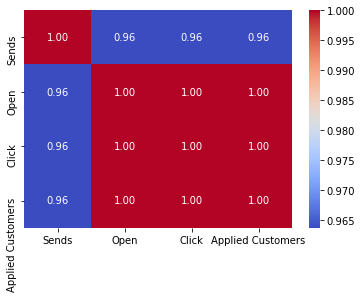

In [8]:
g= sns.heatmap(df_camp[['Sends','Open','Click','Applied Customers']].corr(), annot=True, fmt='.2f', cmap='coolwarm')

In [13]:
d=df_camp['Campaign Name'].unique()
print (len(d))

20


Here, we see that there are 20 different campaigns for xyz compnay

In [ ]:
df_camp.dtypes

Month of Year         int64
Campaign Name        object
Sends                 int64
Open                  int64
Click                 int64
Applied Customers     int64
dtype: object

In [ ]:
'''
df_camp['Month of Year'] = pd.to_datetime(df_camp['Month of Year'], format='%Y%m')

df_camp['Month of Year']=df_camp['Month of Year'].dt.strftime('%Y%m')
df_camp['Month of Year']= pd.to_datetime(df_camp['Month of Year'])
df_camp['Month of Year']
'''

In [15]:
from datetime import datetime as dt
df_camp['Month of Year']= df_camp['Month of Year'].astype(str)
# applying lambda function which will 
df_camp['Date']= df_camp['Month of Year'].apply(lambda x: dt.strptime(x, '%Y%m'))
df_camp.drop('Month of Year', axis=1, inplace=True)
df_camp.head(10)
 #dt.strptime(df_camp['Month of Year'], '%Y%m').date()
#train['date1'] = train['ID'].apply(lambda x: datetime.strptime(x, '%Y%m%d%H'))


,Campaign Name,Sends,Open,Click,Applied Customers,Date
0,CL Promo,80,13,5,1,2019-01-01
1,CL Promo,126,13,5,1,2019-01-01
2,CL Promo,32,7,3,0,2019-01-01
3,CL Promo,28,4,2,0,2019-01-01
4,Churn prevention,66,13,5,1,2019-01-01
5,CL Promo,108,34,14,1,2019-01-01
6,CL Promo,412,136,57,6,2019-01-01
7,winter barometer 2019,276,62,26,3,2019-12-01
8,CL Promo,10,1,1,0,2019-01-01
9,CL Promo,4,2,1,0,2019-01-01


In [22]:
df_camp['Month']= df_camp['Date'].dt.month
df_camp.head(40)

,Campaign Name,Sends,Open,Click,Applied Customers,Date,Month
0,CL Promo,80,13,5,1,2019-01-01,1
1,CL Promo,126,13,5,1,2019-01-01,1
2,CL Promo,32,7,3,0,2019-01-01,1
3,CL Promo,28,4,2,0,2019-01-01,1
4,Churn prevention,66,13,5,1,2019-01-01,1
5,CL Promo,108,34,14,1,2019-01-01,1
6,CL Promo,412,136,57,6,2019-01-01,1
7,winter barometer 2019,276,62,26,3,2019-12-01,12
8,CL Promo,10,1,1,0,2019-01-01,1
9,CL Promo,4,2,1,0,2019-01-01,1


# Which campaigns were the most effective? Why do you think so? Please justify your opinion.

In order to answer this question, we need to calculate the `Conversion Rate` of each  campaign. In my assumption, a conversion rate is the percentage of visitors that complete your desired action to the number of people that could have converted. Therefore, in our case the conversion rate will be:

(Number of Applied customer / Number of people who visited i.e. clicked) x 100

In [35]:
d_eff= df_camp.copy()
d_eff= d_eff.groupby(['Campaign Name']).sum().reset_index()
d_eff['ConversionRate']= (d_eff['Applied Customers']/d_eff['Click']) * 100
d_eff.sort_values('ConversionRate')
d_eff[['Campaign Name', 'ConversionRate']]

,Campaign Name,ConversionRate
0,Activation,11.111111
1,Back_to_school,10.227273
2,Balance 0,9.375000
3,Barometer,8.333333
4,Birthday,9.859155
5,Black_friday,10.096154
6,CL Promo,9.977517
7,Churn prevention,10.000000
8,Easter2019,0.000000
9,First loan free,0.000000


#Campaign Conversion Rate

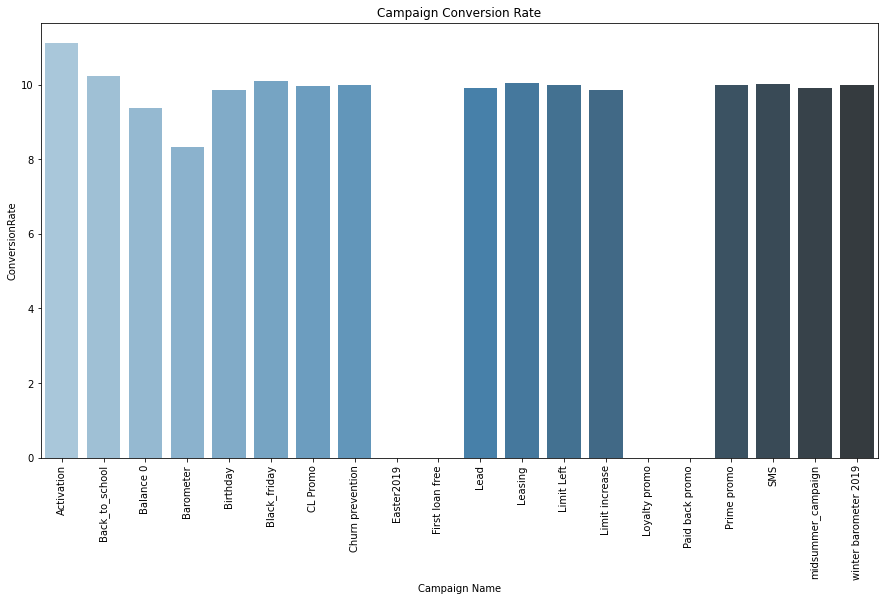

In [44]:

fig,ax= plt.subplots(1)
fig.set_figheight(8)
fig.set_figwidth(15)

ax.set_title('Campaign Conversion Rate')
sns.barplot(x=d_eff['Campaign Name'], y=d_eff['ConversionRate'], data=d_eff,ax=ax, palette="Blues_d")
plt.xticks(rotation=90);


`Activation` campaign did perfrom well compared to other in 2019.

In [43]:
df_camp_eff= df_camp.groupby(['Month','Campaign Name']).sum().reset_index()
df_camp_eff.head

<bound method NDFrame.head of      Month          Campaign Name  Sends  Open  Click  Applied Customers
0        1             Activation    258    22      9                  1
1        1               CL Promo   6578  1350    564                 56
2        1       Churn prevention     66    13      5                  1
3        1        First loan free      4     1      1                  0
4        1                   Lead    742   107     46                  5
..     ...                    ...    ...   ...    ...                ...
116     12         Limit increase    366    96     41                  4
117     12            Prime promo    776   200     85                  9
118     12                    SMS    526    76     32                  3
119     12     midsummer_campaign     10     3      1                  0
120     12  winter barometer 2019   7856  1146    479                 48

[121 rows x 6 columns]>

# Can you give any recommendations or useful insights based on the data?

# What variable(s) would you add to this data to be able to have a better view of CRM campaign effectiveness?

Below variables can be included at the time of data gathering:
1.   Demograpgy
2.   Age of respondents
3. Gender
4. Word Counts/ Subject line length/ Total Links
5.Airtime of the campaign
5. Average run time

